In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### EDA

In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
numaric = data[["age","bmi","children","charges"]]

In [10]:
numaric.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


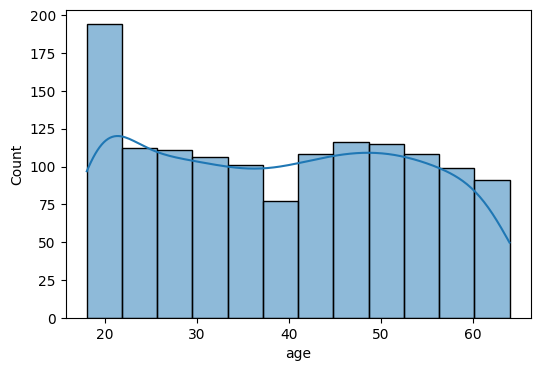

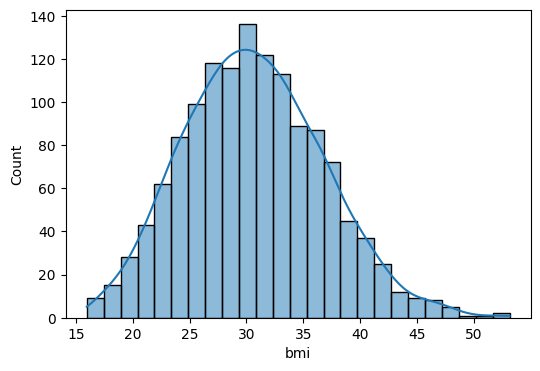

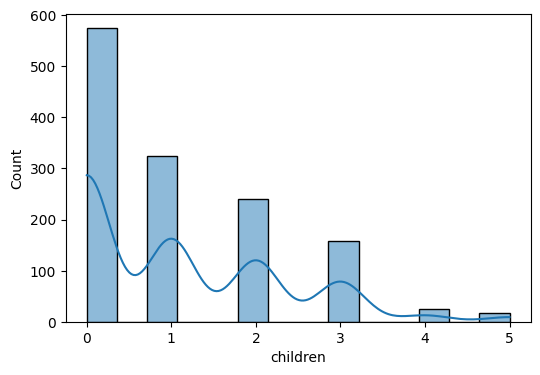

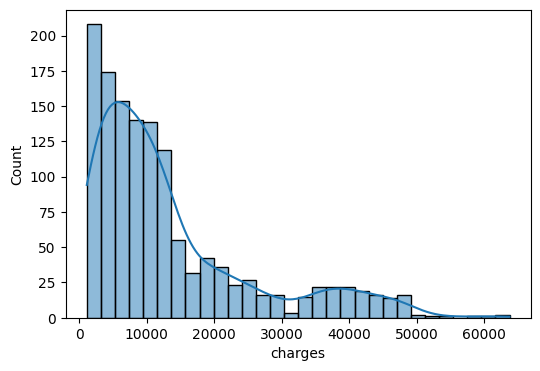

In [11]:
for i in numaric:
    plt.figure(figsize=(6,4))
    sns.histplot(data[i],kde = True)

<Axes: xlabel='children', ylabel='count'>

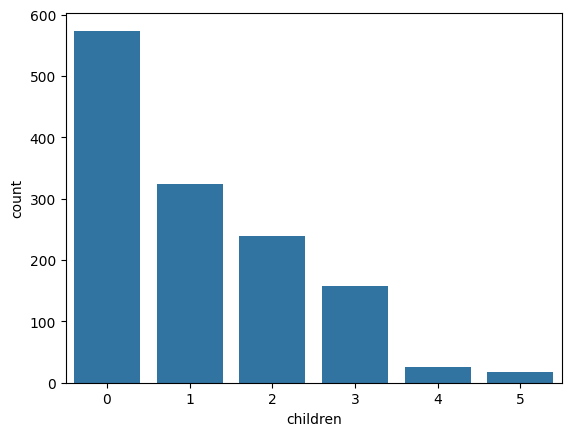

In [12]:
sns.countplot(x=data['children'])

<Axes: xlabel='sex', ylabel='count'>

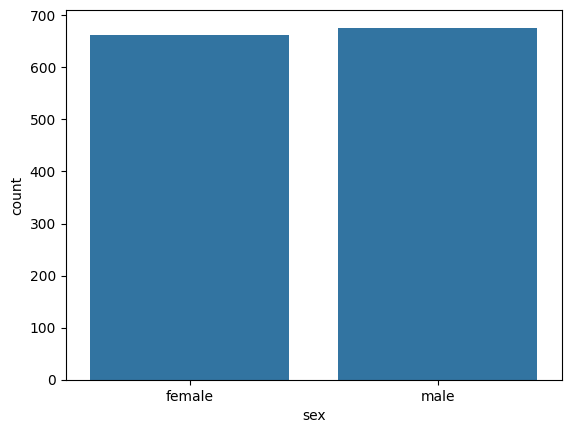

In [13]:
sns.countplot(x=data['sex'])

<Axes: xlabel='smoker', ylabel='count'>

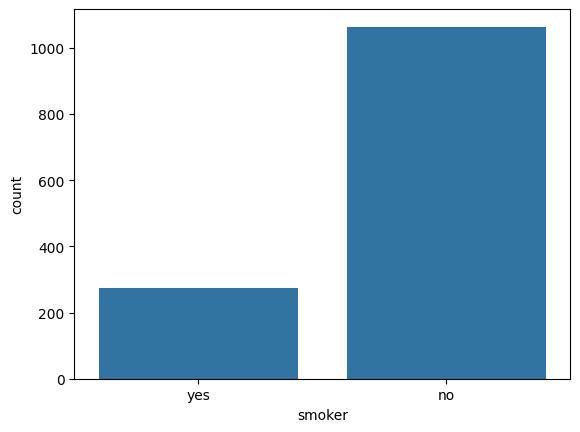

In [14]:
sns.countplot(x=data['smoker'])

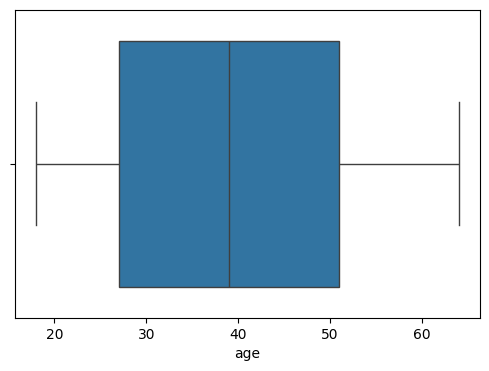

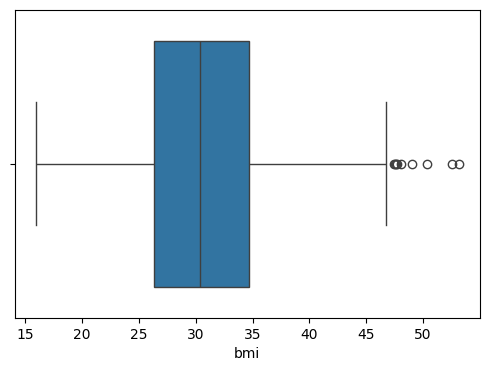

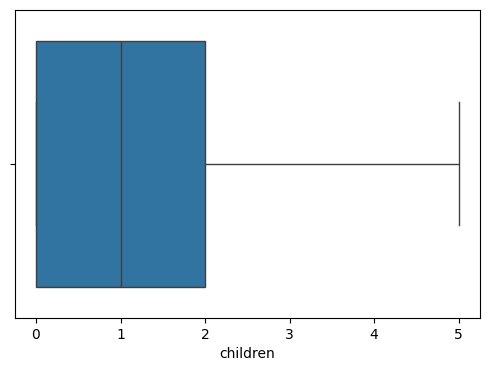

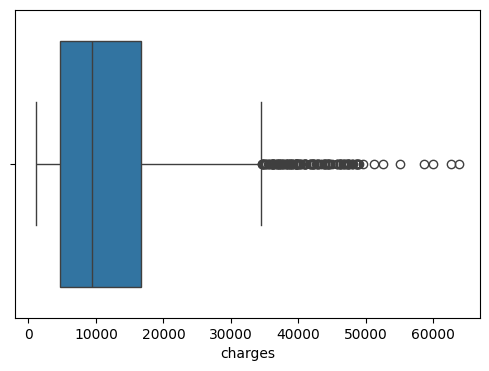

In [15]:
for i in numaric:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[i])

<Axes: >

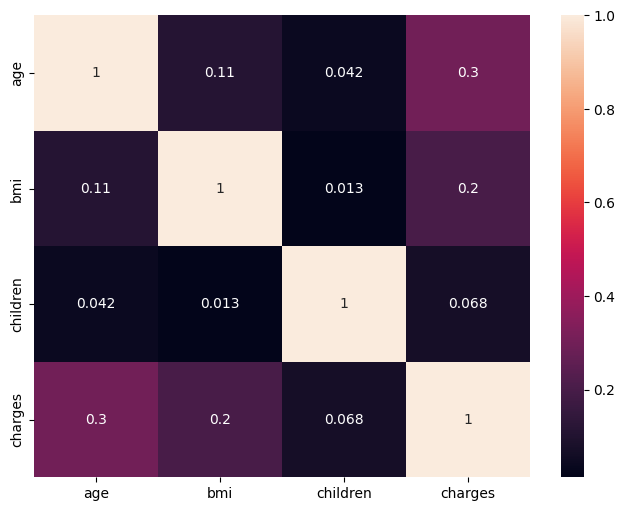

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only = True),annot = True)

# DATA CLEANING

In [17]:
data_cleaned = data.copy()
data_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
data_cleaned.drop_duplicates(inplace=True)

In [19]:
data_cleaned.shape

(1337, 7)

In [20]:
data_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [21]:
data_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [22]:
data_cleaned['sex']= data_cleaned['sex'].map({"male" : 0,"female" : 1})

In [23]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [24]:
data_cleaned['smoker']=data_cleaned['smoker'].map({"yes":1,"no":0})

In [25]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [26]:
data_cleaned.rename(columns={
    'sex':'is_sex',
    'smoker':'is_smoker'
},inplace = True)

In [27]:
data_cleaned.head()

,age,is_sex,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [28]:
data_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [29]:
data_cleaned = pd.get_dummies(data_cleaned,columns = ['region'],drop_first = True)

In [30]:
data_cleaned.head()

,age,is_sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [31]:
data_cleaned=data_cleaned.astype(int)

In [32]:
data_cleaned.head()

,age,is_sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


## Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

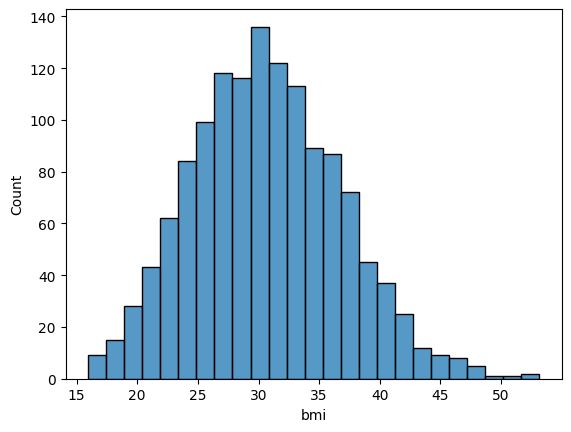

In [33]:
sns.histplot(data['bmi'])

In [34]:
data_cleaned['Bmi_category']=pd.cut(
    data_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['underweight','Normal','Overwight','obese']
)

In [35]:
data_cleaned

,age,is_sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category
0,19,1,27,0,1,16884,0,0,1,Overwight
1,18,0,33,1,0,1725,0,1,0,obese
2,28,0,33,3,0,4449,0,1,0,obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overwight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,obese
1334,18,1,31,0,0,2205,0,0,0,obese
1335,18,1,36,0,0,1629,0,1,0,obese
1336,21,1,25,0,0,2007,0,0,1,Overwight


In [36]:
data_cleaned

,age,is_sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category
0,19,1,27,0,1,16884,0,0,1,Overwight
1,18,0,33,1,0,1725,0,1,0,obese
2,28,0,33,3,0,4449,0,1,0,obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overwight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,obese
1334,18,1,31,0,0,2205,0,0,0,obese
1335,18,1,36,0,0,1629,0,1,0,obese
1336,21,1,25,0,0,2007,0,0,1,Overwight


In [46]:
data_cleaned = pd.get_dummies(data_cleaned,columns = ['Bmi_category'],drop_first=True)

In [48]:
data_cleaned = data_cleaned.astype(int)

In [53]:
data_cleaned.rename(columns={
    'is_sex' :'is_female',
    'smoker': 'is_smoker'
                          },inplace = True)

In [54]:
data_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category_Normal,Bmi_category_Overwight,Bmi_category_obese
0,-1,1,0,0,1,16884,0,0,1,0,1,0
1,-1,0,0,0,0,1725,0,1,0,0,0,1
2,0,0,0,1,0,4449,0,1,0,0,0,1
3,0,0,-1,0,0,21984,1,0,0,1,0,0
4,0,0,0,0,0,3866,1,0,0,0,1,0


In [42]:
from sklearn.preprocessing import StandardScaler

cols = ['age', 'bmi', 'children']
scaler = StandardScaler()

data_cleaned[cols] = scaler.fit_transform(data_cleaned[cols])

In [56]:
data_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category_Normal,Bmi_category_Overwight,Bmi_category_obese
0,-1,1,0,0,1,16884,0,0,1,0,1,0
1,-1,0,0,0,0,1725,0,1,0,0,0,1
2,0,0,0,1,0,4449,0,1,0,0,0,1
3,0,0,-1,0,0,21984,1,0,0,1,0,0
4,0,0,0,0,0,3866,1,0,0,0,1,0


In [59]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'Bmi_category_Normal', 'Bmi_category_Overwight', 'Bmi_category_obese'
]

correlations = {
    feature: pearsonr(data_cleaned[feature], data_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.253749
10,Bmi_category_obese,0.200348
1,bmi,0.127252
6,region_southeast,0.073577
2,children,0.013179
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,Bmi_category_Normal,-0.104042


In [60]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'Bmi_category_Normal', 'Bmi_category_Overwight', 'Bmi_category_obese'
]

In [61]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

data_cleaned['charges_bin'] = pd.qcut(data_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(data_cleaned[col], data_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
Bmi_category_obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
Bmi_category_Overwight,4.25149,0.235557,Accept Null (Drop Feature)
Bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [63]:
final_df = data_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','Bmi_category_obese']]

In [65]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,Bmi_category_obese
0,-1,1,0,0,1,16884,0,0
1,-1,0,0,0,0,1725,1,1
2,0,0,0,1,0,4449,1,1
3,0,0,-1,0,0,21984,0,0
4,0,0,0,0,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0,0,0,1,0,10600,0,1
1334,-1,1,0,0,0,2205,0,1
1335,-1,1,0,0,0,1629,1,1
1336,-1,1,0,0,0,2007,0,0
